0
              killed  injured
state                        
Texas            495   1218.0
California       464   1558.0
Florida          324   1115.0
Illinois         317   1890.0
Georgia          181    659.0
Ohio             179    715.0
Pennsylvania     166    838.0
Louisiana        155    871.0



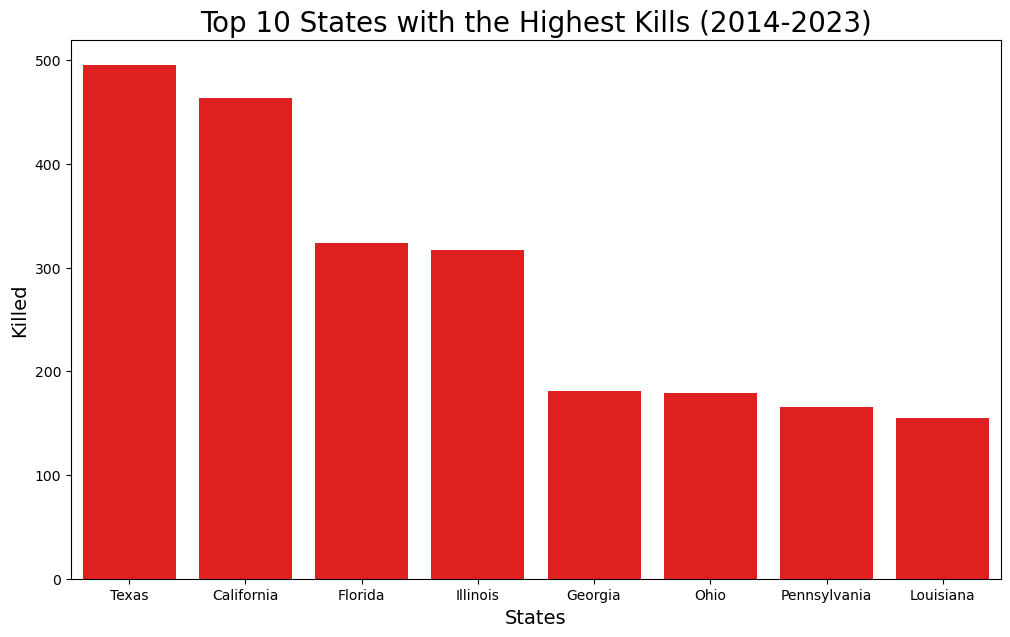

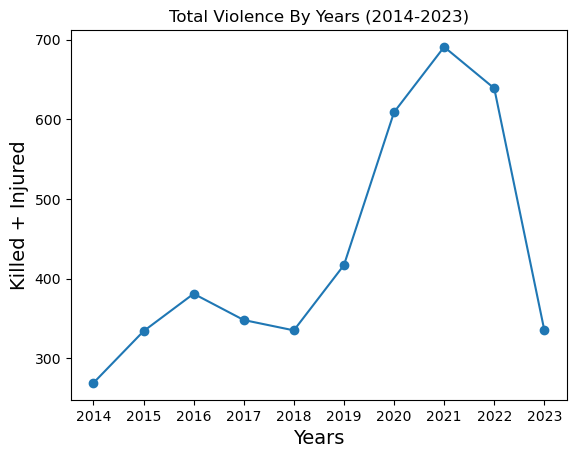

In [3]:
# importing libaries that will be used
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

USA_GunViolence_Set = pd.read_csv("GunViolence.csv")
USA_GunViolence_Set.shape



#checking for duplicated or nill values in the set
TotalDuplidatedValues = USA_GunViolence_Set.duplicated().sum()
print(TotalDuplidatedValues)

#no duplicates but if i did have duplicates I would have 

USA_GunViolence_Set.isna().sum(axis=0)

NullValueFrame = USA_GunViolence_Set[USA_GunViolence_Set.isna().any(axis=1)].copy()
NullValueFrame

#after Viewing the Nan values in address and injured I rationlized that some incidents couldn't find a addresscould be dropped them from the dataset
Cleaned_UsaGunviolenceSet = USA_GunViolence_Set.dropna()
Cleaned_UsaGunviolenceSet

# sorting/groupby/merge Datasets to see top 10 most violent states in the united states 

Top10_StatesByKilled = Cleaned_UsaGunviolenceSet.groupby("state")["killed"]
Top10_StatesInjured = Cleaned_UsaGunviolenceSet.groupby("state")["injured"]

Top10_StatesByKilledSet = Top10_StatesByKilled.sum().sort_values(ascending=False).head(10)
Top10_StatesInjuredSet = Top10_StatesInjured.sum().sort_values(ascending=False).head(10)




Top10_ViolenceByState = pd.merge(Top10_StatesByKilledSet,Top10_StatesInjuredSet, on ="state")

print(Top10_ViolenceByState)
print()

#similir to what we did in todays interview assment, but to caculate year for 



#data visulizations
plt.figure(figsize=(12,7))
           
sns.barplot(x='state', y='killed', data=Top10_ViolenceByState,color = "Red")
plt.title("Top 10 States with the Highest Kills (2014-2023)", fontsize = 20)
plt.xlabel("States", fontsize = 14)
plt.ylabel("Killed", fontsize = 14)
plt.show()



Years = ['2014','2015','2016','2017','2018','2019',
          '2020','2021','2022','2023']

#similiar to todays interview assment/creating a dicitionary 
#loop through all the values in the incident date column and checks if any string matches whats in my Years dataset and if it does adds it to the dictionary

Year_list = []
for incidents in Cleaned_UsaGunviolenceSet["incident_date"]:
    for year in Years:
        if year in incidents:
            Year_list.append(year)
#counting the violence that happens per year by creating another dictionary that counts how many times each year it 

TotalIncidentsForTheYear = {"2014": Year_list.count('2014'),
                            "2015": Year_list.count('2015'),
                            "2016": Year_list.count('2016'),
                            "2017": Year_list.count('2017'),
                            "2018": Year_list.count('2018'),
                            "2019": Year_list.count('2019'),
                            "2020": Year_list.count('2020'),
                            "2021": Year_list.count('2021'),
                            "2022": Year_list.count('2022'),
                            "2023": Year_list.count('2023')}

print()
x_values = list(TotalIncidentsForTheYear.keys())
y_values = list(TotalIncidentsForTheYear.values())

yeargraph = plt.plot(x_values,y_values, marker='o')
plt.title('Total Violence By Years (2014-2023)')
plt.xlabel("Years", fontsize = 14)
plt.ylabel("Killed + Injured", fontsize = 14)
plt.show()

